In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data Loading

In [2]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root = './data',train = True,download=True,transform = transforms.ToTensor())

Files already downloaded and verified


In [3]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [4]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 4,shuffle=True)

In [5]:
dataiter = iter(trainloader)
images,labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
4


### Visualise data

In [6]:
img = images[0]
print(type(img))

<class 'torch.Tensor'>


In [7]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [8]:
npimg = np.transpose(npimg,(1,2,0))
print(npimg.shape)

(32, 32, 3)


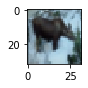

In [9]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [10]:
def imshow(img):
    npimg = img.numpy()
    npimg = np.transpose(npimg,(1,2,0))
    plt.imshow(npimg)
    plt.show()

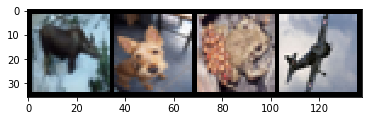

deer dog frog plane


In [11]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

### Single Convolutional Layer

In [12]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN,self).__init__()
        self.conv1 = nn.Conv2d(3,16,3,padding = (1,1),stride = (2,2)) # padding = (1,1) , stride = (2,2) 
        # Syntax (3 input channels, 16 output channels,kernel _size = 3)
        
    def forward(self,x):
        x = self.conv1(x)
        return x
    

In [13]:
net = FirstCNN()

In [14]:
out = net(images)
out.shape

# 4 - corresponds to batch size
# 16 - output channels
# 30 ,30 - image size , from 32,32 to 30,30 

torch.Size([4, 16, 16, 16])

In [15]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [16]:
out1 = out[0,0,:,:].detach().numpy()
print(out1.shape)

(16, 16)


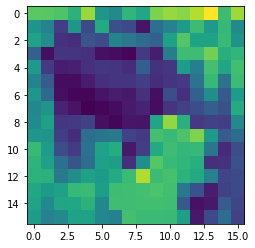

In [17]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

### Deep Convolutional Network

In [18]:
class FirstCNN_v2(nn.Module):
    def __init__(self):
        super(FirstCNN_v2,self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3,8,3), # (N,3,32,32) -> (N,8,30,30)
            nn.Conv2d(8,16,3) # (N,8,30,30) -> (N,16,28,28)
        )
        
    def forward(self,x):
        x = self.model(x)
        return x

In [19]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

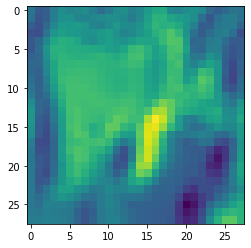

In [20]:
plt.imshow(out[0,0,:,:].detach().numpy())

In [21]:
class FirstCNN_v3(nn.Module):
    def __init__(self):
        super(FirstCNN_v3,self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3,6,5),    # (N,3,32,32) -> (N,6,28,28)
            nn.AvgPool2d(2,stride = 2),  #(N,6,28,28) -> (N , 6, 14,14)
            nn.Conv2d(6,15,5),           #(N,6,14,14) -> (N,15,10,10)
            nn.AvgPool2d(2,stride = 2)  #(N,15,10,10) ->(N,15,5,5)
        )
        
    def forward(self,x):
        x = self.model(x)
        return x

In [22]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 15, 5, 5])

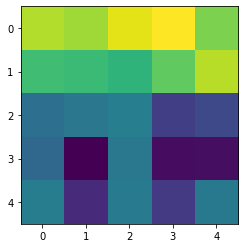

In [23]:
plt.imshow(out[0,0,:,:].detach().numpy())

### Defining LeNet

In [45]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3,6,5),          # (N,3,32,32) -> (N,6,28,28)
            nn.Tanh(),
            nn.AvgPool2d(2,stride = 2), # (N,6,28,28) -> (N,6,14,14)
            nn.Conv2d(6,16,5),          # (N,6,14,14) -> (N,16,10,10)
            nn.Tanh(),
            nn.AvgPool2d(2,stride = 2)  # (N,16,10,10) -> (N,16,5,5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),    #(N,16x5x5) i.e (N,400) -> (N,120)
            nn.Tanh(),             
            nn.Linear(120,84),     #(N,120) -> (N,84)
            nn.Tanh(),
            nn.Linear(84,10)        #(N,84) -> (N,10)
        )
    def forward(self,x):
        #print(x.shape)
        x = self.cnn_model(x)
        #print(x.shape)
        x = x.view(x.size(0),-1) # Reshaping (N,16,5,5) ->(N,400)
        x = self.fc_model(x)
        #print(x.shape)
        return x

In [46]:
net = LeNet()
out = net(images)
out.shape

torch.Size([4, 10])

In [47]:
print(out)

tensor([[ 0.0248,  0.0697,  0.0235, -0.0158,  0.0521,  0.0106,  0.0374, -0.0206,
         -0.0434, -0.0175],
        [ 0.0379,  0.0503,  0.0232, -0.0281,  0.0597,  0.0045,  0.0246, -0.0159,
         -0.0251, -0.0057],
        [ 0.0287,  0.0476,  0.0192, -0.0239,  0.0663,  0.0114,  0.0174, -0.0088,
         -0.0350, -0.0038],
        [ 0.0159,  0.0419,  0.0210, -0.0171,  0.0722,  0.0078,  0.0280, -0.0005,
         -0.0461, -0.0134]], grad_fn=<AddmmBackward>)


In [48]:
max_values,pred_class = torch.max(out.data,1)
print(pred_class)

tensor([1, 4, 4, 4])


### Training LeNet

In [49]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root = './data',train = True,download=True,transform = transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset,batch_size = batch_size,shuffle=True)

Files already downloaded and verified


In [50]:
testset = torchvision.datasets.CIFAR10(root = './data',train = False,download=True,transform = transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset,batch_size = batch_size,shuffle=False)

Files already downloaded and verified


In [51]:
def evaluation(datasetloader):
    total,correct = 0,0
    for data in datasetloader:
        inputs ,labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100*(correct/total)

In [52]:
net = LeNet()

In [53]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16,Test acc : 38.34, Train acc : 39.27
Epoch: 1/16,Test acc : 43.19, Train acc : 43.77
Epoch: 2/16,Test acc : 46.48, Train acc : 47.71
Epoch: 3/16,Test acc : 49.40, Train acc : 50.99
Epoch: 4/16,Test acc : 51.12, Train acc : 53.13
Epoch: 5/16,Test acc : 52.61, Train acc : 55.19
Epoch: 6/16,Test acc : 53.27, Train acc : 56.85
Epoch: 7/16,Test acc : 54.16, Train acc : 58.78
Epoch: 8/16,Test acc : 54.99, Train acc : 60.28
Epoch: 9/16,Test acc : 54.95, Train acc : 60.79
Epoch: 10/16,Test acc : 54.74, Train acc : 61.04
Epoch: 11/16,Test acc : 55.03, Train acc : 62.24
Epoch: 12/16,Test acc : 55.49, Train acc : 63.44
Epoch: 13/16,Test acc : 55.67, Train acc : 64.10
Epoch: 14/16,Test acc : 56.34, Train acc : 65.63
Epoch: 15/16,Test acc : 56.14, Train acc : 66.45


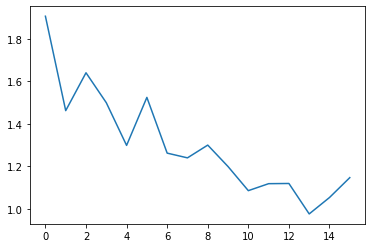

Wall time: 14min 15s


In [54]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):
    for i,data in enumerate(trainloader,0):
        
        inputs,labels = data
        
        outputs = net(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        opt.step()
        opt.zero_grad()
        
        
        loss_arr.append(loss.item())
    loss_epoch_arr.append(loss.item())
    
    print('Epoch: %d/%d,Test acc : %0.2f, Train acc : %0.2f' %(epoch,max_epochs ,evaluation(testloader),evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()

### Move to GPU

In [55]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [56]:
def evaluation(datasetloader):
    total,correct = 0,0
    for data in datasetloader:
        inputs ,labels = data
        inputs ,labels = inputs.to(device),labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100*(correct/total)

In [57]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16,Test acc : 38.38, Train acc : 38.64
Epoch: 1/16,Test acc : 41.15, Train acc : 41.25
Epoch: 2/16,Test acc : 45.36, Train acc : 45.81
Epoch: 3/16,Test acc : 49.49, Train acc : 50.45
Epoch: 4/16,Test acc : 50.37, Train acc : 52.07
Epoch: 5/16,Test acc : 52.05, Train acc : 54.61
Epoch: 6/16,Test acc : 52.11, Train acc : 55.53
Epoch: 7/16,Test acc : 53.29, Train acc : 56.68
Epoch: 8/16,Test acc : 54.43, Train acc : 58.74
Epoch: 9/16,Test acc : 54.47, Train acc : 59.40
Epoch: 10/16,Test acc : 55.34, Train acc : 60.39
Epoch: 11/16,Test acc : 55.76, Train acc : 61.60
Epoch: 12/16,Test acc : 56.13, Train acc : 62.85
Epoch: 13/16,Test acc : 55.61, Train acc : 62.86
Epoch: 14/16,Test acc : 55.83, Train acc : 63.59
Epoch: 15/16,Test acc : 56.40, Train acc : 64.72


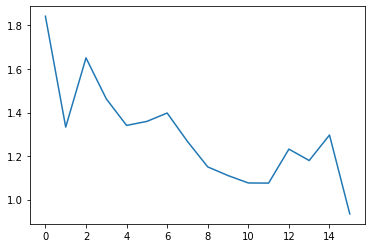

Wall time: 4min 38s


In [58]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):
    for i,data in enumerate(trainloader,0):
        
        inputs,labels = data
        inputs,labels = inputs.to(device),labels.to(device)
        
        outputs = net(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        opt.step()
        opt.zero_grad()
        
        
        loss_arr.append(loss.item())
    loss_epoch_arr.append(loss.item())
    
    print('Epoch: %d/%d,Test acc : %0.2f, Train acc : %0.2f' %(epoch,max_epochs ,evaluation(testloader),evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()

### Basic Visualisation

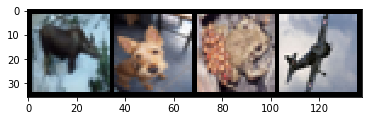

In [60]:
imshow(torchvision.utils.make_grid(images))

In [61]:
net = net.to('cpu')

In [62]:
out = net(images)

In [63]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

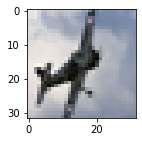

In [67]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

C:\Users\Tarun Makkar\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


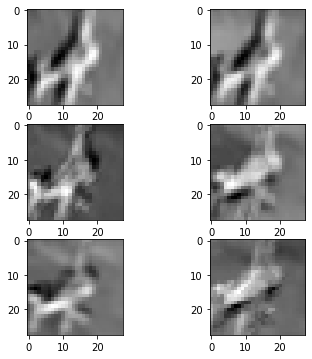

In [69]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3,2,i+1)
    plt.imshow(out[image_id,i,:,:].detach().numpy(),cmap = 'binary')
plt.show()